<a href="https://colab.research.google.com/github/sbylash/23_Shasia-Sasa_PCVK/blob/main/uts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

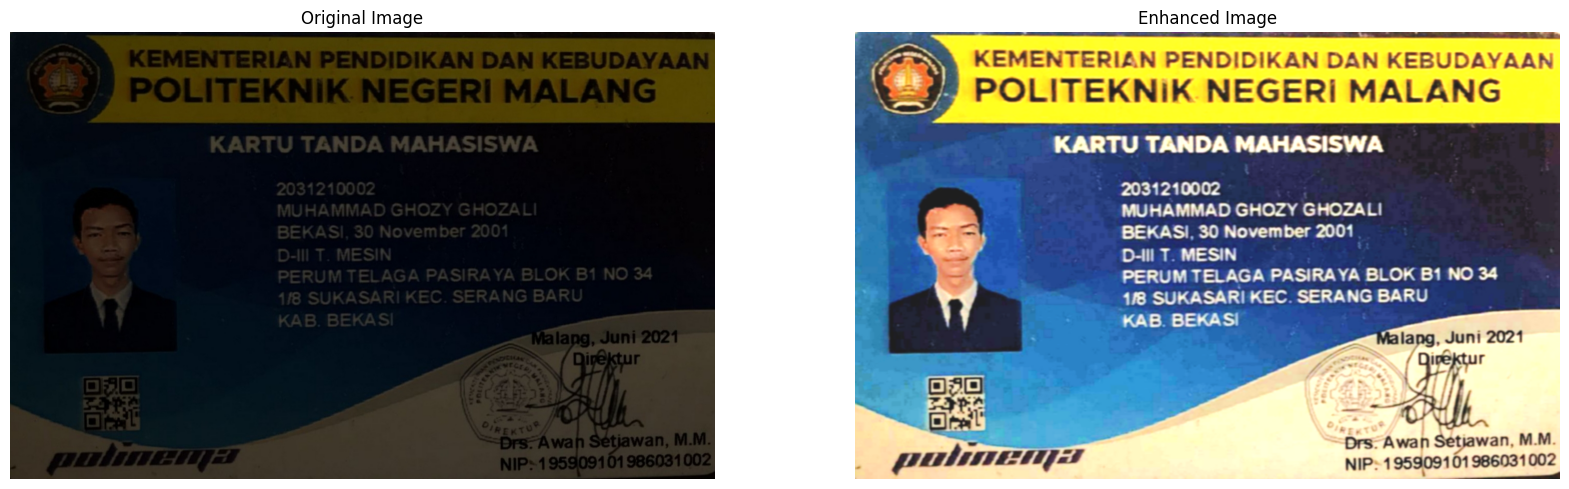

True

In [11]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# Load the image
img = cv.imread('/content/ktm_uts.jpg', cv.IMREAD_COLOR)

# Convert the image to HSV color space
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# Equalize the histogram of the V (Brightness) channel
h, s, v = cv.split(hsv)
v_eq = cv.equalizeHist(v)

# Merge the equalized V channel back with H and S channels
hsv_eq = cv.merge([h, s, v_eq])

# Convert back to BGR color space
img_eq = cv.cvtColor(hsv_eq, cv.COLOR_HSV2BGR)

# Apply Gaussian filtering to reduce noise and smooth the image
filtered = cv.GaussianBlur(img_eq, (7, 5), 0)

# Adjust brightness (increase contrast)
brightened = cv.convertScaleAbs(filtered, alpha=1.2, beta=30)

# Display the original and enhanced images side by side
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(brightened, cv.COLOR_BGR2RGB))
plt.title("Enhanced Image")
plt.axis('off')
plt.show()

# Save the enhanced image
cv.imwrite('/content/enhanced_ktm_uts.jpg', brightened)